In [31]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.preprocessing.image as pp
from secrets import randbelow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convert(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    return image, label

def augment(image,label):
    
    image,label = convert(image, label)
    
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    image = tf.image.resize_with_crop_or_pad(image, 224+30, 224+30) # Add 6 pixels of padding
    image = tf.image.rot90(image, k=randbelow(4))
    
    image = tf.image.random_crop(image, size=[224,224,3]) # Random crop back to 28x28
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

    return image,label


ds, info = tfds.load(name="imagenette", with_info=True, split=["train","validation"])
ds_train=ds[0]
ds_test=ds[1]
assert isinstance(ds_train, tf.data.Dataset)

def normalize(x):
    y = {'image': tf.image.convert_image_dtype(x['image'], tf.float32), 'label': x['label']}
    y = (tf.image.resize(y['image'], (224,224)), y['label'])
    return y


num_train_examples= info.splits['train'].num_examples
BATCH_SIZE = 64

ds_train = ds_train.map(lambda x: normalize(x))
ds_train = ds_train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(64)
ds_train = ds_train.batch(64)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(64)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [3]:
def grab_one_image():
    z = []
    for x in ds[0].take(1):
        z = x['image']
    return z


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float16 by default, call `tf.keras.backend.set_floatx('float16')`. To change just this layer, pass dtype='float16' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



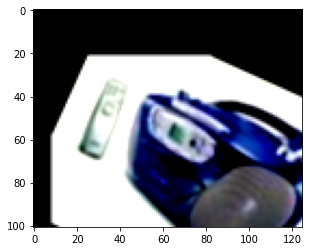

In [145]:
x = grab_one_image()
#x = tf.image.convert_image_dtype(x, tf.float32)
#print(x)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(.25),
    tf.keras.layers.experimental.preprocessing.RandomContrast(.8),
    tf.keras.layers.experimental.preprocessing.RandomFlip(),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(.25, .25, interpolation='bilinear'),
])
x = tf.image.convert_image_dtype(x, dtype=tf.float16)
augmented_image = data_augmentation(tf.expand_dims(x, 0), training=True)


#augmented_image = tf.keras.layers.experimental.preprocessing.CenterCrop(120,200)

#augmented_image = tf.image.convert_image_dtype(augmented_image, tf.float32)
#print(augmented_image)
#print(augmented_image.astype(int,casting='no'))
#print(tf.cast((augmented_image),dtype=tf.int8), )
#print(np.count_nonzero(augmented_image-x))
plt.imshow(tf.reshape(augmented_image,(101, 125, 3)))

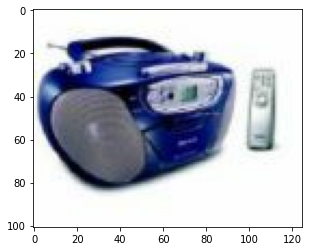

In [111]:
plt.imshow(x)